# Bears

This notebook will use linear regression to predict the age of a bear based on it's features. These features include:
 * head length
 * head width,
 * neck (circumfrence?) 
 * length
 * chest (width?)
 * weight
 
The data used in this notebook can be found https://people.sc.fsu.edu/~jburkardt/datasets/triola/bears.csv 

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import seaborn as sns
from ml.regression.linear import LinearRegressionModel
%matplotlib inline

### Load the csv file and convert age to years

In [5]:
data = pd.read_csv('./ml/datasets/bears.csv')
data['AGE'] /= 12.0
data.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,1.583333,7,1,11.0,5.5,16.0,53.0,26.0,80
1,4.583333,7,1,16.5,9.0,28.0,67.5,45.0,344
2,6.750000,9,1,15.5,8.0,31.0,72.0,54.0,416
3,9.583333,7,1,17.0,10.0,31.5,72.0,49.0,348
4,8.666667,8,2,15.5,6.5,22.0,62.0,35.0,166


### Explore the different pairs of features visually to see if we can spot linear relationships between them

[]

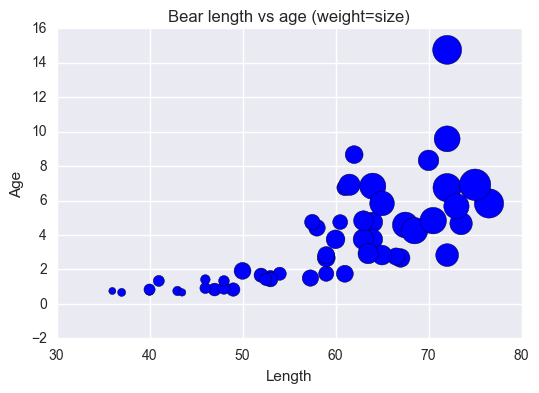

In [6]:
scatter(data['LENGTH'], data['AGE'], s=data['WEIGHT'])
title('Bear length vs age (weight=size)')
xlabel('Length')
ylabel('Age')
plot()

### Split the data training and test sets

In [8]:
train = data.sample(frac=0.7, random_state = 4)
test = data.drop(train.index)
test = test.sort_values('WEIGHT')
target = 'AGE'
features = ['HEADLEN', 'HEADWTH', 'NECK', 'LENGTH', 'CHEST', 'WEIGHT']

### Create a linear regression model

In [9]:
model = LinearRegressionModel()
model.eta = 4e-7
model.tolerance = 100
model.learn(train, features, target)

### Visualize predictions

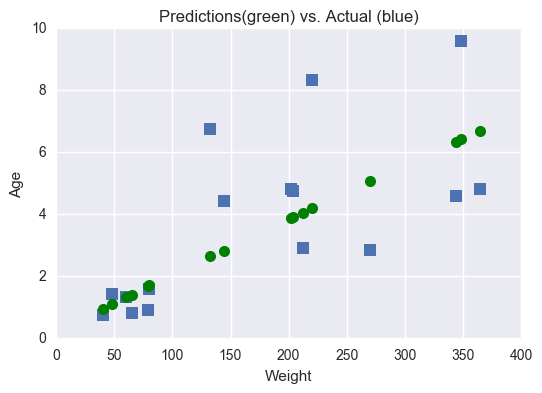

In [10]:
predictions = model.predict(test, features)
#figure(figsize=(10, 6))
title('Predictions(green) vs. Actual (blue)')
ylabel('Age')
xlabel('Weight')
plot(test['WEIGHT'], test['AGE'], 's', test['WEIGHT'], predictions, 'go', markersize=8.0)

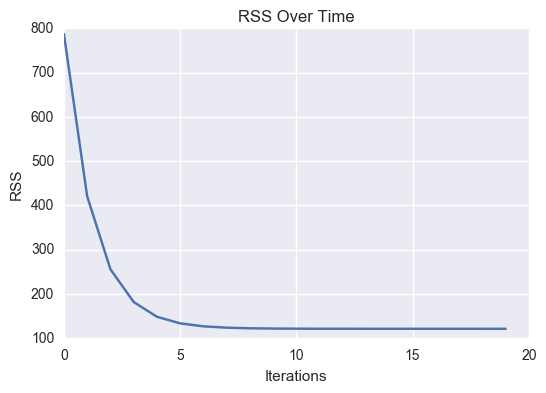

In [11]:
#figure(figsize=(16, 9))
title('RSS Over Time')
ylabel('RSS')
xlabel('Iterations')
plot(model.rss)

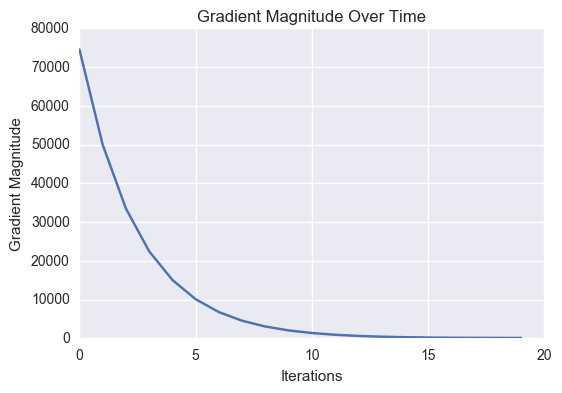

In [12]:
title('Gradient Magnitude Over Time')
ylabel('Gradient Magnitude')
xlabel('Iterations')
plot(model.gradient_magnitudes)

In [13]:
training_error = model.get_squared_error_loss(train, features, target)
test_error = model.get_squared_error_loss(test, features, target)
print('Training Error: {}, Test Error: {}'.format(training_error, test_error))

Training Error: 3.1986076698520645, Test Error: 3.868272299698563


## Feature Engineering - Creating Polynomial Functions

In [19]:
data = pd.read_csv('./ml/datasets/bears.csv')
data['HEADLEN'] /= 12.0

### Visualize all pairs of features

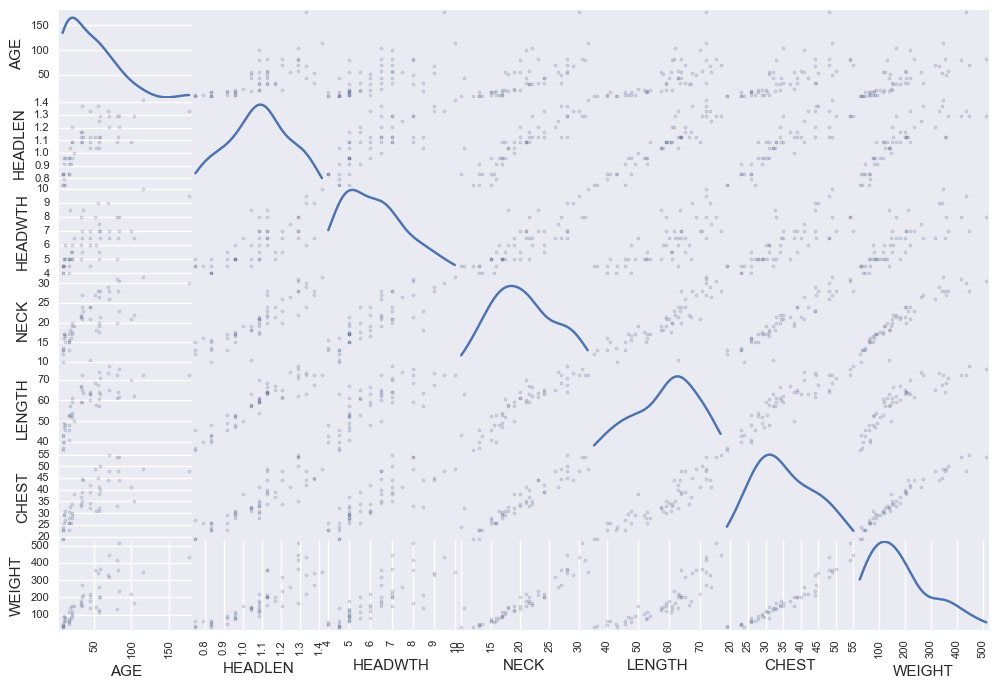

In [20]:
pd.tools.plotting.scatter_matrix(
    data[['AGE', 'HEADLEN', 'HEADWTH', 'NECK', 'LENGTH','CHEST', 'WEIGHT']], 
    figsize=(12, 8), alpha=0.2, diagonal='kde')
show()

### Create new columns for engineered features

In [21]:
features = [ 'NECK', 'NECK_2', 'LENGTH', 'LENGTH_2', 'WEIGHT', 'WEIGHT_2']
data['NECK_2'] = data['NECK'] ** 2
data['LENGTH_2'] = data['LENGTH'] ** 2
data['WEIGHT_2'] = data['WEIGHT'] ** 2
target = 'AGE'

### Split the data into train and test sets

In [22]:
train = data.sample(frac=0.7, random_state= 4)
test = data.drop(train.index)

### Tune and train the model

In [23]:
model = LinearRegressionModel()
model.eta = 8e-13
model.tolerance = 100000
model.learn(train, features, target)

### Visualize the fit

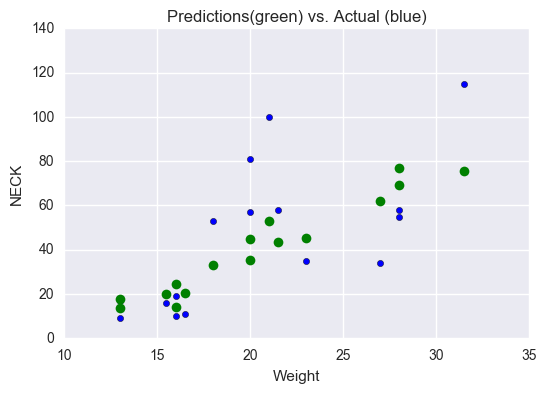

In [24]:
test['prediction'] = model.predict(test, features)
test = test.sort_values(by='NECK')
title('Predictions(green) vs. Actual (blue)')
ylabel('NECK')
xlabel('Weight')
scatter(test['NECK'], test['AGE'])
plot(test['NECK'], test['prediction'], 'go')